In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm

In [61]:
loc, scale = 3, 2
size = 200
x = norm.rvs(loc=loc, scale=scale, size=size)

(array([ 3.,  0.,  4.,  2.,  5.,  7., 10.,  7.,  9., 11., 23.,  9., 15.,
        18., 22., 12., 16., 11.,  2.,  5.,  2.,  2.,  0.,  3.,  0.,  1.,
         0.,  0.,  0.,  1.]),
 array([-2.06642099, -1.65091512, -1.23540925, -0.81990339, -0.40439752,
         0.01110835,  0.42661422,  0.84212009,  1.25762596,  1.67313182,
         2.08863769,  2.50414356,  2.91964943,  3.3351553 ,  3.75066117,
         4.16616703,  4.5816729 ,  4.99717877,  5.41268464,  5.82819051,
         6.24369638,  6.65920224,  7.07470811,  7.49021398,  7.90571985,
         8.32122572,  8.73673159,  9.15223745,  9.56774332,  9.98324919,
        10.39875506]),
 <a list of 30 Patch objects>)

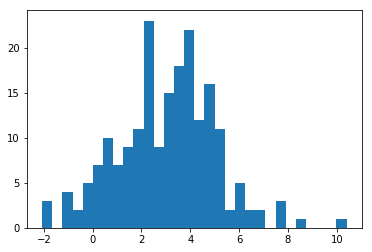

In [62]:
plt.hist(x, bins=30)

In [63]:
from functools import reduce
import operator

from scipy.optimize import LinearConstraint, rosen_der, rosen_hess

def likelihood(args):
    loc, scale = args
    return -np.log(reduce(operator.imul, norm.pdf(x, loc=loc, scale=scale)))

minimize(likelihood, [1.1, 3])

      fun: 423.6882933128379
 hess_inv: array([[2.09527765e-02, 4.66811043e-07],
       [4.66811043e-07, 1.01200201e-02]])
      jac: array([-7.62939453e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([3.03723391, 2.01275198])

/Users/justdoit/workspace/python/v3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Users/justdoit/workspace/python/v3.7/lib/python3.7/site-packages/matplotlib/colors.py:942: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/Users/justdoit/workspace/python/v3.7/lib/python3.7/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


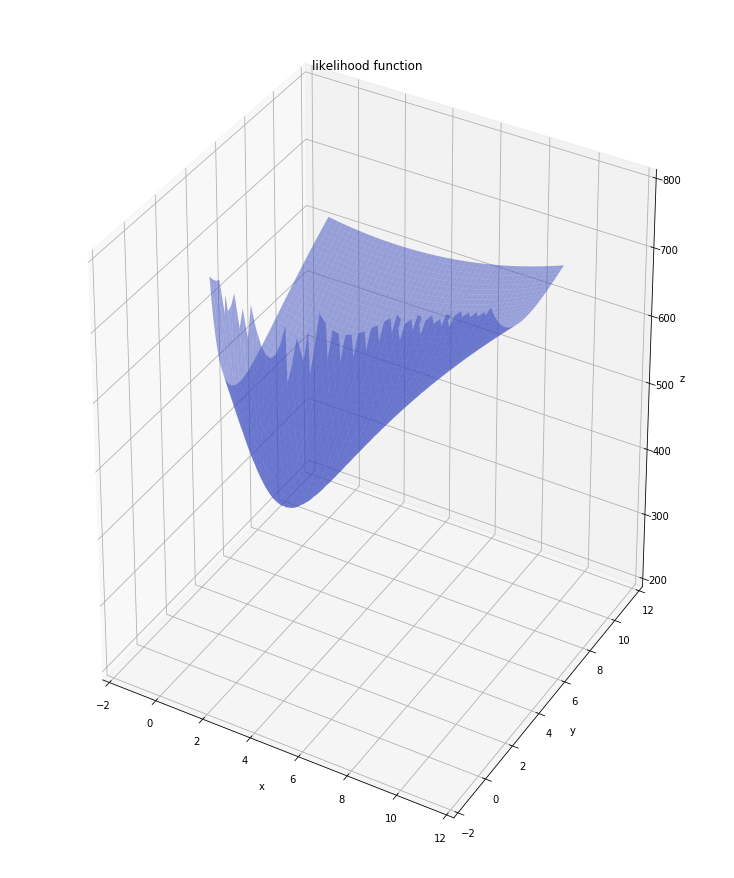

In [64]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(10, 12))
ax = Axes3D(fig)

X = np.arange(0.1, 10, 0.1)
Y = np.arange(0.1, 10, 0.1)
X, Y = np.meshgrid(X, Y)
X1, Y1 = X.ravel(), Y.ravel()
Z = np.array(list(likelihood(v) for v in zip(X1, Y1))).reshape(*X.shape)

ax.set_xlim(-2, 12)
ax.set_ylim(-2, 12)
ax.set_zlim(200, 800)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.5)
plt.title("likelihood function")
plt.show()